# Redes Neuronales Convolucionales (CNN) para la clasificación de imágenes

In [1]:
import pandas as pd
import numpy as np

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

In [3]:
dir_datos = './Data/Datos_Rotulos_Trafico/'

In [4]:
trayecto_test = os.path.join(dir_datos, 'prueba.p')
trayecto_train = os.path.join(dir_datos, 'entrenamiento.p')
trayecto_validation = os.path.join(dir_datos, 'validacion.p')

In [5]:
if os.path.exists(trayecto_test):
    print("El archivo prueba.p existe en la ruta especificada.")
else:
    raise Exception("El archivo prueba.p no existe en la ruta especificada.")

El archivo prueba.p existe en la ruta especificada.


In [6]:
if os.path.exists(trayecto_train):
    print("El archivo entrenamiento.p existe en la ruta especificada.")
else:
    raise Exception("El archivo entrenamiento.p no existe en la ruta especificada.")

El archivo entrenamiento.p existe en la ruta especificada.


In [7]:
import pickle

def get_data(filePath):
    with open(filePath, "rb") as archivo:
        objeto_cargado = pickle.load(archivo)

    y = objeto_cargado.pop('labels')
    x = objeto_cargado.pop('features')
    return x, y

X_train, y_train = get_data(os.path.join(dir_datos, 'entrenamiento.p'))
X_test, y_test = get_data(os.path.join(dir_datos, 'prueba.p'))
X_validation, y_validation = get_data(os.path.join(dir_datos, 'validacion.p'))

##  Visualización de los datos de las imágenes

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
X_train.shape

(34799, 32, 32, 3)

In [10]:
una_imagen = X_train[0]

In [11]:
una_imagen

array([[[28, 25, 24],
        [27, 24, 23],
        [27, 24, 22],
        ...,
        [32, 28, 24],
        [31, 27, 25],
        [31, 27, 26]],

       [[29, 26, 25],
        [27, 25, 23],
        [27, 25, 23],
        ...,
        [32, 28, 24],
        [31, 27, 24],
        [30, 27, 25]],

       [[28, 26, 26],
        [27, 25, 23],
        [26, 25, 23],
        ...,
        [32, 28, 24],
        [31, 27, 24],
        [30, 27, 25]],

       ...,

       [[27, 24, 23],
        [28, 25, 24],
        [30, 25, 24],
        ...,
        [27, 24, 23],
        [28, 24, 22],
        [29, 25, 22]],

       [[28, 23, 23],
        [29, 24, 24],
        [31, 25, 24],
        ...,
        [27, 24, 23],
        [28, 24, 22],
        [28, 24, 21]],

       [[29, 23, 23],
        [30, 24, 24],
        [32, 24, 23],
        ...,
        [27, 24, 22],
        [27, 23, 21],
        [26, 22, 20]]], dtype=uint8)

In [12]:
una_imagen.shape

(32, 32, 3)

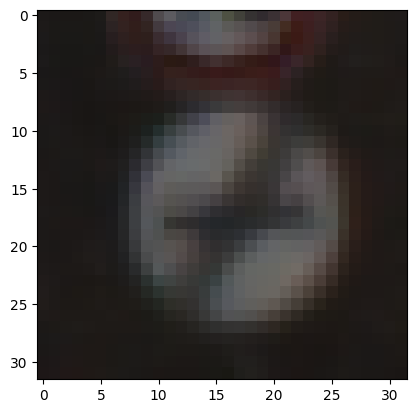

In [13]:
plt.imshow(una_imagen)

¿Qué está pasando acá?   ¿No se supone que es una imagen B-N?

Lo que pasa es que, como ya vimos, Matplotlib tiene una variedad de esquemas de colores "colormaps".  Si así lo deseamos podemos cambiar el esquema para que se vea en B-N

# Pre-procesamiento de los datos

Necesitamos asegurar que las etiquetas (metas) sean comprensibles por nuestra CNN

## Etiquetas

In [14]:
y_train

array([41, 41, 41, ..., 25, 25, 25], dtype=uint8)

In [15]:
y_test

array([16,  1, 38, ...,  6,  7, 10], dtype=uint8)

Parece que las etiquetas son literalmente categorías numéricas, pero están en formato numérico.  Será necesario convertirlos por el método de "one hot encoding" para que puedan ser usadas por la CNN, de lo contrario pensará que es algún tipo de problema de regresión sobre un eje contínuo.

Afortunadamente, Keras tiene una función fácil para hacer esta conversión:

In [16]:
from tensorflow.keras.utils import to_categorical

In [17]:
y_train.shape

(34799,)

In [18]:
ejemplo_y = to_categorical(y_train)

In [19]:
ejemplo_y

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [20]:
ejemplo_y.shape

(34799, 43)

In [21]:
ejemplo_y[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

el método to_categorical puede inferir, por default, el número de clases...y lo hace bastante bien.  Sin embargo, si queremos estar seguros (podría ser que nuestros datos no tuvieran uno de los posibles valores), o si fuera un caso más complicado, lo podemos especificar.  En este caso son 10

In [22]:
y_cat_test = to_categorical(y_test, 34799)

In [23]:
y_cat_train = to_categorical(y_train, 34799)

### Procesamiento de los datos X

Es mejor normalizar los datos de X

Normalmente lo haríamos con el método MinMax() de sklearn, porque no podemos asumir que sabemos qué valores mínimo y máximo podrían venir en los datos futuros que querramos clasificar.  Sin embargo, como este ejercicio trata de imágenes, sí sabemos que todos los valores serán entre 0 y 255 por lo que podemos tomar una salida fácil.

In [24]:
una_imagen.max()

113

In [25]:
una_imagen.min()

19

In [26]:
X_train = X_train / 255
X_test = X_test / 255

In [27]:
una_normalizada = X_train[0]

In [28]:
una_normalizada.max()

0.44313725490196076

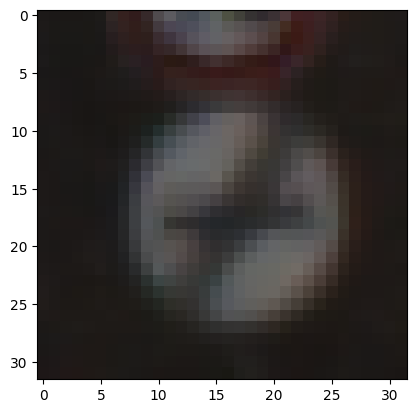

In [29]:
plt.imshow(una_normalizada)

Vemos que es exactamente igual!

## Cambiar el formato de los datos

Ahorita los datos son 60,000 imágenes almacenadas en un formato de 28 X 28 pixeles.

Esto es correcto para una CNN, pero necesitamos agregar una dimensión más para mostrar que estamos trabajando con un canal RGB (ya que, técnicamente, las imágenes están en B-N, solo mostrando valores entre 0-255 en un solo canal).  Una imagen a colores tendría 3 canales o dimensiones.

In [30]:
X_train.shape

(34799, 32, 32, 3)

In [31]:
X_test.shape

(12630, 32, 32, 3)

Modificar la forma para incluir la dimensión correspondiente al canal (en este caso es 1, cuando sea a colores es 3)

In [32]:
X_train.shape

(34799, 32, 32, 3)

In [33]:
X_test.shape

(12630, 32, 32, 3)

# Entrenamiento del modelo

Importamos para crear capas normales, capas convolucionales, capas de pooling, y necesitaremos una capa para "aplanar" los datos (a una sola dimensión)

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [35]:
modelo = Sequential()

### Capa Convolucional

El número de filtros es configurable, generalmente se usa un múltiplo de 2.  El tamaño también es configurable, sin embargo es bueno ajustarlo al tamaño de la imágen.  Cómo el filtro se irá "corriendo" es bueno que el tamaño de la imagen sea un múltiplo del tamaño del filtro

In [36]:
modelo.add(Conv2D(filters = 32, kernel_size = (4, 4), input_shape = (32, 32, 1), activation = 'relu'))

### Capa de sub-muestreo (Pooling)

In [37]:
modelo.add(MaxPool2D(pool_size = (2, 2)))

### Capa parar aplanar 

Antes de llegar a la capa final es importante "aplanar" de 28 X 28 a 764 

In [38]:
modelo.add(Flatten())

### Capas escondidas

Serán de 128 "neuronas" o unidades (este valor es configurable)

In [39]:
modelo.add(Dense(128, activation = 'relu'))

### La última capa es la clasificadora

Tenemos 10 posibles clases por lo que se usa la función de activación "softmax" que es para multi-clases

In [40]:
modelo.add(Dense(10, activation = 'softmax'))

### Se compila el modelo

Como una opción se pueden pedir una o más métricas, para ver cuáles hay, se puede consultar en:

https://keras.io/metrics/

In [41]:
modelo.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [42]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               802944    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 804778 (3.07 MB)
Trainable params: 804778 (3.07 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

### Uso de "callbacks"

Una forma de detener las épocas es usando el EarlyStopping.  Esto tiene un parámetro que se denomina "patience" que, como dice su nombre indica el grado de paciencia que debe tener una vez se detecta que el parámetro monitoreado empiece a desviarse de lo deseado.  La paciencia se mide en épocas, muchos usan 2 o 3 para dar chance a que el ultimo valor no haya sido alguna anomalidad, y darle otra oportunidad.

In [43]:
from tensorflow.keras.callbacks import EarlyStopping

In [44]:
detencion_temprana = EarlyStopping(monitor = 'val_loss', patience = 2)

## Entrenar el modelo

In [45]:
modelo.fit(X_train, y_cat_train, epochs = 10, validation_data = (X_test,y_cat_test),
           callbacks = [detencion_temprana])

Epoch 1/10


ValueError: in user code:

    File "c:\Users\andre\OneDrive\Documentos\GitHub\Lab2-DS\.venv\lib\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\andre\OneDrive\Documentos\GitHub\Lab2-DS\.venv\lib\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\andre\OneDrive\Documentos\GitHub\Lab2-DS\.venv\lib\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\andre\OneDrive\Documentos\GitHub\Lab2-DS\.venv\lib\site-packages\keras\src\engine\training.py", line 1080, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\andre\OneDrive\Documentos\GitHub\Lab2-DS\.venv\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\andre\OneDrive\Documentos\GitHub\Lab2-DS\.venv\lib\site-packages\keras\src\engine\input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential' (type Sequential).
    
    Input 0 of layer "conv2d" is incompatible with the layer: expected axis -1 of input shape to have value 1, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer 'sequential' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=float32)
      • training=True
      • mask=None


## Evaluar el modelo

Para saber qué métricas hay disponibles:

In [ ]:
modelo.metrics_names

In [ ]:
metricas = pd.DataFrame(modelo.history.history)

In [ ]:
metricas.head()

In [ ]:
metricas[['accuracy', 'val_accuracy']].plot()

In [ ]:
metricas[['loss', 'val_loss']].plot()

In [ ]:
print(modelo.metrics_names)
print(modelo.evaluate(X_test, y_cat_test, verbose = 0))

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
Hasta hace poco, en Tensorflow se podía utilizar la instrucción:
    
    predicciones = modelo.predict_classes(X_test)
    
En las versiones más recientes de Tensorflow debe usarse:
    
Classification multiclase:
    
predicciones = np.argmax(modelo.predict(X_test), axis=-1)

Classification Binaria

predicciones = (modelo.predict(X_test) > 0.5).astype("int32")

In [ ]:
#predicciones = modelo.predict_classes(X_test)
#predicciones = modelo.predict(X_test)
predicciones = np.argmax(modelo.predict(X_test), axis=-1)

In [ ]:
y_cat_test.shape

In [ ]:
y_cat_test[0]

In [ ]:
predicciones[0]

In [ ]:
y_test

In [ ]:
print(classification_report(y_test, predicciones))

In [ ]:
confusion_matrix(y_test, predicciones)

In [ ]:
import seaborn as sns

In [ ]:
plt.figure(figsize = (10, 6))
sns.heatmap(confusion_matrix(y_test,predicciones),annot = True)

# Predecir una imagen dada

In [ ]:
mi_numero = X_test[6]

In [ ]:
plt.imshow(mi_numero.reshape(28,28))

Recordar que la forma debe ser:  (num_imagenes, ancho, alto, num_canales_color)

In [ ]:
np.argmax(modelo.predict(mi_numero.reshape(1,28,28,1)), axis=-1)
#modelo.predict_classes(mi_numero.reshape(1,28,28,1))

Parece que la CNN funciona bastante bien!